In [33]:
#%pip install pandas geopandas shapely contextily

In [34]:

import pandas as pd

# Load the traffic count data
traffic_count_df = pd.read_csv('../count/THINGS WE DID/merged_traffic_count_with_coordinates.csv')
accident_df = pd.read_csv('../accidents/puf Äùàûÿ.csv', encoding='ISO-8859-8')


In [35]:

import geopandas as gpd
from shapely.geometry import Point

# Convert Traffic Count Data to GeoDataFrame
traffic_count_gdf = gpd.GeoDataFrame(
    traffic_count_df, 
    geometry=gpd.points_from_xy(traffic_count_df.X, traffic_count_df.Y),
    crs="EPSG:4326"  # Assuming WGS84
)

# Convert Accident Data to GeoDataFrame
accident_gdf = gpd.GeoDataFrame(
    accident_df, 
    geometry=gpd.points_from_xy(accident_df.X, accident_df.Y),
    crs="EPSG:4326"  # Assuming WGS84
)


In [36]:

# Perform a Spatial Join to Match Accidents with Traffic Counts
joined_gdf = gpd.sjoin(accident_gdf, traffic_count_gdf, how="inner", predicate='intersects')


In [37]:

# Filter out accidents that don't have corresponding traffic count data
relevant_accidents_gdf = joined_gdf.dropna(subset=["kamut_kle_rehev"])


In [38]:

# Analyze the filtered data - Descriptive statistics including accident severity
print("Descriptive statistics for filtered data including accident severity:")
print(relevant_accidents_gdf[['kamut_kle_rehev', 'HUMRAT_TEUNA']].describe())

# Correlation Analysis - between traffic counts and accident severity
correlation = relevant_accidents_gdf['kamut_kle_rehev'].corr(relevant_accidents_gdf['HUMRAT_TEUNA'])
print(f"Correlation between traffic counts and accident severity: {correlation}")


Descriptive statistics for filtered data including accident severity:
       kamut_kle_rehev  HUMRAT_TEUNA
count      3360.000000    3360.00000
mean        555.241071       2.80000
std         561.002134       0.40006
min           0.000000       2.00000
25%          84.000000       3.00000
50%         355.000000       3.00000
75%         929.250000       3.00000
max        3216.000000       3.00000
Correlation between traffic counts and accident severity: 0.001826563583560658


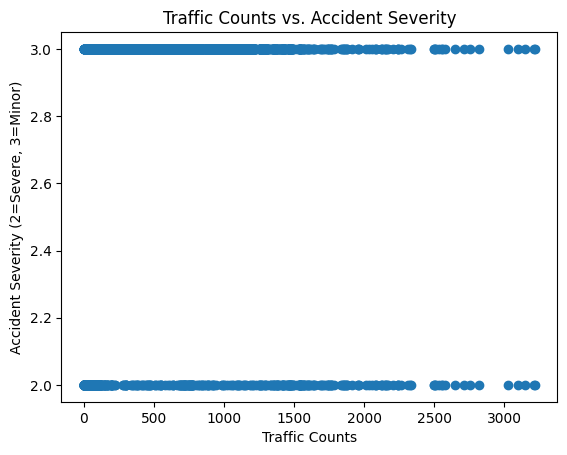

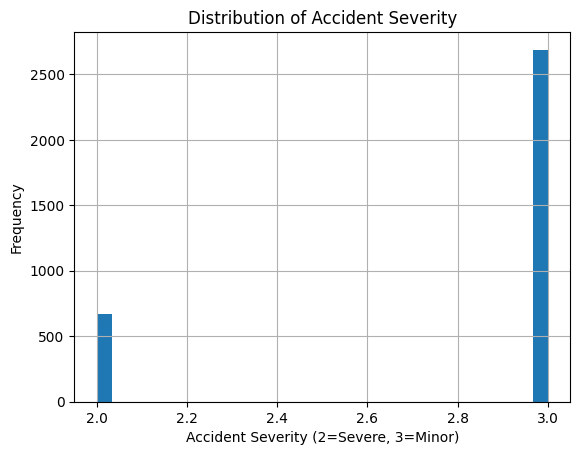

In [39]:

import matplotlib.pyplot as plt

# Scatter plot of traffic counts vs. accident severity
plt.scatter(relevant_accidents_gdf['kamut_kle_rehev'], relevant_accidents_gdf['HUMRAT_TEUNA'])
plt.xlabel('Traffic Counts')
plt.ylabel('Accident Severity (2=Severe, 3=Minor)')
plt.title('Traffic Counts vs. Accident Severity')
plt.show()

# Histogram of accident severity
relevant_accidents_gdf['HUMRAT_TEUNA'].hist(bins=30)
plt.xlabel('Accident Severity (2=Severe, 3=Minor)')
plt.ylabel('Frequency')
plt.title('Distribution of Accident Severity')
plt.show()


In [40]:

# Optional: Filter for severe accidents only
severe_accidents_gdf = relevant_accidents_gdf[relevant_accidents_gdf['HUMRAT_TEUNA'] == 2]

# Further analysis on severe accidents
print("Descriptive statistics for severe accidents:")
print(severe_accidents_gdf[['kamut_kle_rehev', 'HUMRAT_TEUNA']].describe())


Descriptive statistics for severe accidents:
       kamut_kle_rehev  HUMRAT_TEUNA
count       672.000000         672.0
mean        553.191964           2.0
std         735.742897           0.0
min           0.000000           2.0
25%          42.750000           2.0
50%          95.000000           2.0
75%         992.000000           2.0
max        3216.000000           2.0


Descriptive statistics for severe accidents:
       kamut_kle_rehev  HUMRAT_TEUNA
count       672.000000         672.0
mean        553.191964           2.0
std         735.742897           0.0
min           0.000000           2.0
25%          42.750000           2.0
50%          95.000000           2.0
75%         992.000000           2.0
max        3216.000000           2.0


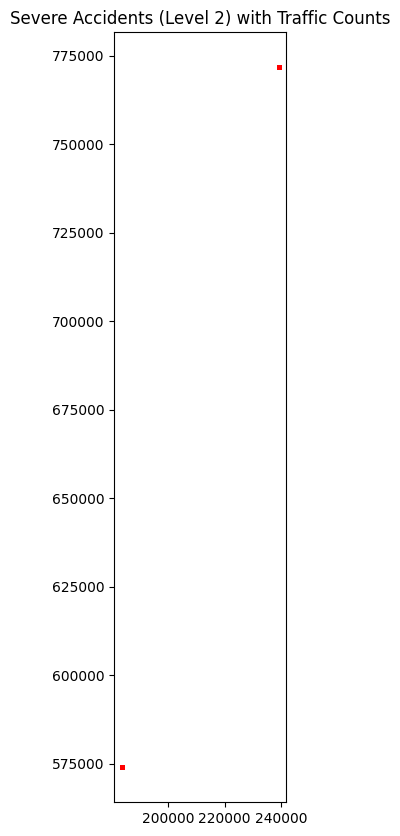

In [41]:

# Filter for severe accidents only (severity level 2)
severe_accidents_gdf = relevant_accidents_gdf[relevant_accidents_gdf['HUMRAT_TEUNA'] == 2]

# Descriptive statistics for severe accidents
print("Descriptive statistics for severe accidents:")
print(severe_accidents_gdf[['kamut_kle_rehev', 'HUMRAT_TEUNA']].describe())

# Map Visualization - Display the severe accidents with traffic counts on a map
severe_accidents_gdf.plot(markersize=5, figsize=(10, 10), color='red', alpha=0.5)
plt.title("Severe Accidents (Level 2) with Traffic Counts")
plt.show()

# Save the filtered severe accidents data for further analysis
severe_accidents_gdf.to_file("severe_accidents_with_traffic_counts.geojson", driver="GeoJSON")


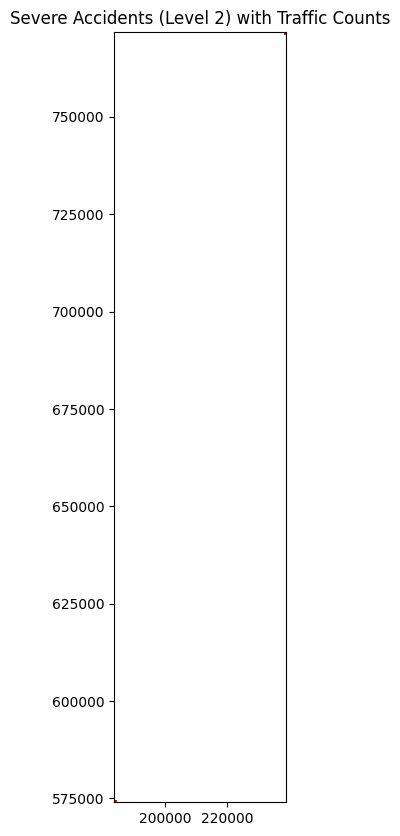

In [42]:

# Calculate the extent (min and max values of X and Y coordinates)
min_x, min_y, max_x, max_y = severe_accidents_gdf.total_bounds

# Plot with adjusted map limits
ax = severe_accidents_gdf.plot(markersize=5, figsize=(10, 10), color='red', alpha=0.5)
ax.set_xlim([min_x, max_x])
ax.set_ylim([min_y, max_y])
plt.title("Severe Accidents (Level 2) with Traffic Counts")
plt.show()


In [43]:

# Check the current CRS
print(severe_accidents_gdf.crs)

# Reproject to EPSG:4326 (if needed)
severe_accidents_gdf = severe_accidents_gdf.to_crs(epsg=4326)


EPSG:4326
